<a href="https://colab.research.google.com/github/OviRata/PMP-2024/blob/main/ExamenSesiuneRataOvidiu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%pip install pymc

In [4]:
import pandas as pd
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

In [5]:
#ex1
data = pd.read_csv('date_alegeri_turul2.csv')
X = np.array(data[['Varsta', 'Sex', 'Educatie', 'Venit']])
y = np.array(data['Vot'])



In [28]:
with pm.Model() as logistic_model:
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=1, shape=4)
    mu = alpha + pm.math.dot(X, beta)
    p = pm.Deterministic('p', pm.math.sigmoid(mu))
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)
    trace = pm.sample(50, random_seed=42)


Sampling chain 0, 0 divergences ━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━  37% 0:00:10 / 0:00:05

Sampling chain 0, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━  57% 0:00:05 / 0:00:06

Output()

ERROR:pymc.stats.convergence:There were 50 divergences after tuning. Increase `target_accept` or reparameterize.


In [30]:


beta_posterior = trace.posterior['beta']
print("Coeficientul mediue pt :", np.mean(beta_posterior[:, 0]))

print("Coeficientul mediue pt :", np.mean(beta_posterior[:, 1]))

print("Coeficientul mediue pt :", np.mean(beta_posterior[:, 2]))

print("Coeficientul mediue pt :", np.mean(beta_posterior[:, 3]))
alpha_posterior = trace.posterior['alpha']
print("Coef. liber mediu: ", np.mean( alpha_posterior ));


Coeficientul mediue pt : <xarray.DataArray 'beta' ()> Size: 8B
array(0.28210426)
Coordinates:
    draw     int64 8B 0
Coeficientul mediue pt : <xarray.DataArray 'beta' ()> Size: 8B
array(0.30002261)
Coordinates:
    draw     int64 8B 1
Coeficientul mediue pt : <xarray.DataArray 'beta' ()> Size: 8B
array(0.27825363)
Coordinates:
    draw     int64 8B 2
Coeficientul mediue pt : <xarray.DataArray 'beta' ()> Size: 8B
array(0.31935327)
Coordinates:
    draw     int64 8B 3
Coef. liber mediu:  <xarray.DataArray 'alpha' ()> Size: 8B
array(-1.30859688)


In [18]:
print(az.summary(trace, hdi_prob=0.95))


#az.plot_trace(trace)
#plt.show()


#with logistic_model:
 #   pm.plot_posterior(trace, var_names=['beta'], ref_val=0)

          mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
alpha   -1.309  0.642    -2.503     -0.782      0.352    0.275       3.0   
beta[0]  0.339  0.326     0.000      0.663      0.216    0.178       3.0   
beta[1] -0.000  0.844    -1.146      0.824      0.551    0.452       3.0   
beta[2]  0.694  0.174     0.375      0.839      0.098    0.081       3.0   
beta[3]  0.108  0.344    -0.233      0.520      0.227    0.187       3.0   
...        ...    ...       ...        ...        ...      ...       ...   
p[495]   0.987  0.014     0.964      1.000      0.009    0.007       3.0   
p[496]   0.860  0.145     0.661      1.000      0.094    0.078       3.0   
p[497]   0.941  0.061     0.855      1.000      0.039    0.032       3.0   
p[498]   0.938  0.066     0.834      1.000      0.042    0.034       3.0   
p[499]   0.975  0.028     0.929      1.000      0.017    0.014       3.0   

         ess_tail  r_hat  
alpha        49.0   2.23  
beta[0]      74.0   2.31  
beta[1

In [20]:
print('variabilele ce influenteaza cel mai mult rezultatul sunt cele cu ponderea din beta cea mai mare in modul.')
print('variabilele ce influenteaza cel mai mult rezultatul sunt: Sex si Venit')

variabilele ce influenteaza cel mai mult rezultatul sunt cele cu ponderea din beta cea mai mare in modul.
variabilele ce influenteaza cel mai mult rezultatul sunt: Varsta si Educatie


In [19]:
x_2 = data[['Sex','Venit']];

In [22]:
with pm.Model() as logistic_model_c:
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=1, shape=2)


    mu = alpha + pm.math.dot(x_2, beta)
    p = pm.Deterministic('p', pm.math.sigmoid(mu))


    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)


    trace_c = pm.sample(50, random_seed=42)

Output()

Coeficientul mediue pt Varsta: <xarray.DataArray 'beta' ()> Size: 8B
array(0.28210426)
Coordinates:
    draw     int64 8B 0
Coeficientul mediue pt Educatie: <xarray.DataArray 'beta' ()> Size: 8B
array(0.30002261)
Coordinates:
    draw     int64 8B 1
Coef. liber mediu:  <xarray.DataArray 'alpha' ()> Size: 8B
array(-1.30859688)


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha   -0.581  0.367  -0.913    0.481      0.126    0.092      12.0   
beta[0]  0.347  0.318   0.019    0.663      0.211    0.174       3.0   
beta[1]  0.711  0.163   0.448    0.937      0.075    0.057      10.0   
p[0]     0.861  0.142   0.681    1.000      0.093    0.077       3.0   
p[1]     0.899  0.102   0.775    1.000      0.067    0.055       3.0   
...        ...    ...     ...      ...        ...      ...       ...   
p[495]   0.947  0.055   0.867    1.000      0.035    0.029       3.0   
p[496]   0.876  0.126   0.720    1.000      0.083    0.068       3.0   
p[497]   0.897  0.104   0.769    1.000      0.069    0.057       3.0   
p[498]   0.924  0.079   0.812    1.000      0.051    0.042       3.0   
p[499]   0.914  0.090   0.790    1.000      0.058    0.047       3.0   

         ess_tail  r_hat  
alpha        60.0   2.24  
beta[0]      88.0   2.23  
beta[1]      66.0   2.23  
p[0]         46.0   2.23  


/usr/local/lib/python3.11/dist-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/usr/local/lib/python3.11/dist-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/usr/local/lib/python3.11/dist-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


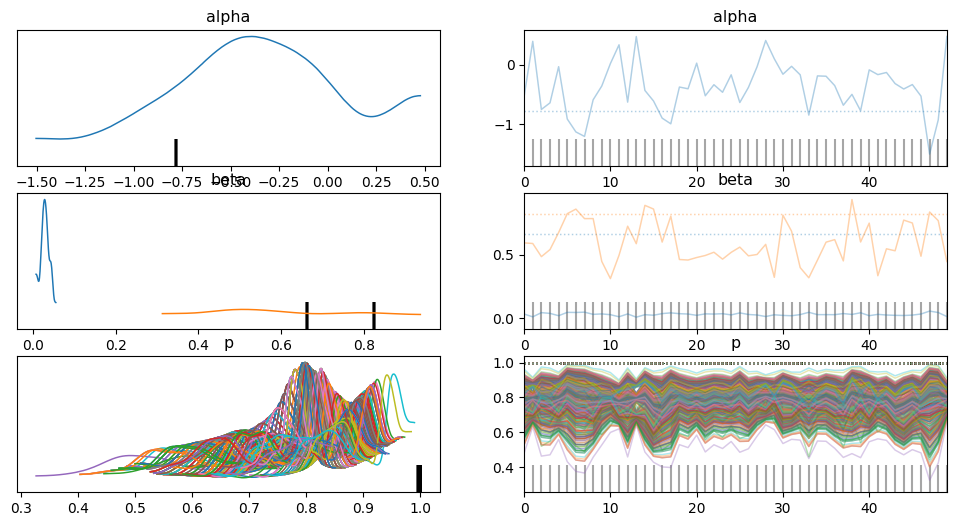

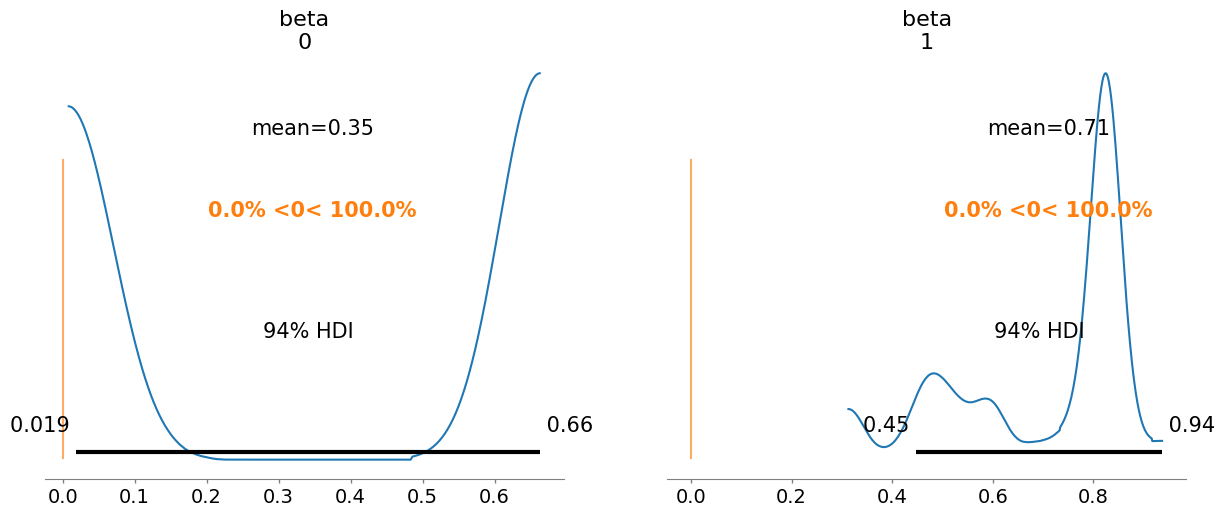

In [23]:
print(az.summary(trace_c, hdi_prob=0.94))


az.plot_trace(trace_c)
plt.show()


with logistic_model_c:
    pm.plot_posterior(trace_c, var_names=['beta'], ref_val=0)

In [25]:
probs = []

beta_1 = 0.347
beta_2 = 0.711
alpha_mean = -0.581
for i in range( 500 ):
  probs.append( 1 / (1 + np.exp( -(  alpha_mean + np.dot([beta_1, beta_2], x_2[i].T)  )    )) )

probs = np.array(probs);

mean_probs = probs.mean(axis=0)



x_vals = np.linspace(x_2[:, 0].min(), x_2[:, 0].max(), 100)
y_vals = -(alpha_mean / beta_2) - (beta_1 / beta_2) * x_vals


plt.scatter(x_2[:, 0], x_2[:, 1], c = y > 0.5, cmap='coolwarm', label="Preziceri Vot")
plt.plot(x_vals, y_vals, color='black', linestyle='--', label="Granita de decizie")

plt.xlabel("")
plt.ylabel("")
plt.title("Granita de decizie pentru modelul de regresie bayesiana")
plt.colorbar(label="Preziceri Vot")
plt.legend()
plt.show()

KeyError: 0

In [ ]:
#pentru punctul a
pm.compute_log_likelihood(trace ,model=logistic_model)
waic_p = az.waic(trace, scale="deviance")
waic_p

In [ ]:
loo_p = az.loo(trace, scale="deviance")
loo_p

In [ ]:
#pentru punctul c
pm.compute_log_likelihood(trace_c ,model=logistic_model)
waic_p = az.waic(trace_c, scale="deviance")
waic_p

In [ ]:
loo_p = az.loo(trace, scale="deviance")
loo_p

In [ ]:
#ex2
data_iris = pd.read_csv('iris.csv');
X_iris = data_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']];
y_iris = data_iris['species'];

In [ ]:
import pytensor.tensor as pt
clusters = 2
with pm.Model() as model_mgp:
  p = pm.Dirichlet('p', a=np.ones(clusters))
  means = pm.Normal('means', mu=np.array([.9, 1]) * cs_exp.mean(), sigma=10, shape=clusters)
  sd = pm.HalfNormal('sd', sigma=10)
  order_means = pm.Potential('order_means', pt.switch(means[1]-means[0] < 0, -np.inf, 0))

  y = pm.NormalMixture('y', w=p, mu=means, sigma=sd, observed=cs_exp)
  idata_mgp = pm.sample(1000, random_seed=123, return_inferencedata=True)